In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from matplotlib.ticker import ScalarFormatter

import statsmodels.api as sm

In [2]:
# setup
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIG_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
plt.rc('text', usetex=True)
plt.rcParams['axes.axisbelow'] = True
'''cm=plt.get_cmap('CMRmap')
NUM_COLORS = len(all_papers)+1
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)][::-1]'''
# https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
colors = [(230, 25, 75), (60, 180, 75), (255, 225, 25), (0, 130, 200), (245, 130, 48), (145, 30, 180),
          (70, 240, 240), (240, 50, 230), (210, 245, 60), (250, 190, 190), (0, 128, 128),
          (230, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0), (170, 255, 195), (128, 128, 0),
          (255, 215, 180), (0, 0, 128), (128, 128, 128), (0, 0, 0)]
colors = [[x[0] / 255., x[1] / 255., x[2] / 255.] for x in colors]

# Draw the plots without  marker
markers = ['s', 'D', 'h', '>', 'o', 'p', '*', 'x', '+']


In [3]:
#Data
pca_dim = np.array([16,32,64,128,256,512,1024,2048,])
pca_res_acc = np.array([[7.626,8.038,8.002],
[10.530,10.820,10.566],
[15.144,14.778,15.106],
[19.778,20.222,20.006],
[26.876,27.136,26.818],
[33.258,33.496,33.196],
[37.356,38.950,38.222],
[39.096,38.044,38.088]])
pca_res_acc_mean, pca_res_acc_std = pca_res_acc.mean(axis=1), pca_res_acc.std(axis=1)
pca_res_ari = np.array([[3.908, 4.071, 3.936],[5.781, 5.784, 5.749],[8.421, 8.301, 8.481],[12.146, 12.010, 12.039],[16.794, 16.855, 16.503],[21.359, 21.302, 21.271],[23.187, 23.071, 23.897],[23.061, 22.192, 22.566]])

pca_res_ari_mean, pca_res_ari_std = pca_res_ari.mean(axis=1), pca_res_ari.std(axis=1)

print((pca_res_acc_mean+pca_res_acc_std).max()*1.1, (pca_res_ari_mean+pca_res_ari_std).max()*1.1)

42.784733362438146 26.125135091428362


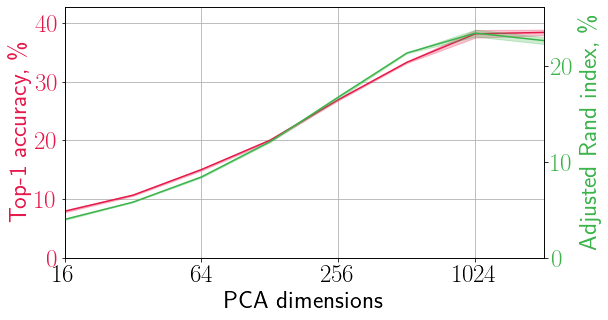

In [4]:
fig, ax1 = plt.subplots(figsize=(9, 5))


color = 'tab:red'
ax1.set_xlabel('PCA dimensions')
ax1.set_ylabel('Top-1 accuracy, \%', color=colors[0])

ax1.plot(pca_dim,pca_res_acc_mean,color=colors[0],label='Accuracy')    
ax1.fill_between(pca_dim, pca_res_acc_mean+pca_res_acc_std, pca_res_acc_mean-pca_res_acc_std,
                     color=colors[0], alpha=.25)
ax1.tick_params(axis='y', labelcolor=colors[0])

ax1.set_ylim(0,(pca_res_acc_mean+pca_res_acc_std).max()*1.1)
ax1.grid()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Adjusted Rand index, \%', color=colors[1])

ax2.plot(pca_dim,pca_res_ari_mean,color=colors[1],label='Adjusted Rand index')    
ax2.fill_between(pca_dim, pca_res_ari_mean+pca_res_ari_std, pca_res_ari_mean-pca_res_ari_std,
                     color=colors[1], alpha=.25)
ax2.tick_params(axis='y', labelcolor=colors[1])

#plt.legend()
plt.xlim(16,2048)
plt.xscale('log', basex=2)
ax2.set_ylim(0,(pca_res_ari_mean+pca_res_ari_std).max()*1.1)
ax1.xaxis.set_major_formatter(ScalarFormatter())
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
# plt.xlabel('')
# plt.ylabel('')
fig.tight_layout()
plt.savefig('pca_ablation.pdf')
plt.show()

In [5]:
over_cnt = np.array([1,1.25,1.5,1.75,2,2.5,3,4,5])
over_acc = np.array([[38.838,38.222,39.962],
[43.836,43.360,44.104],
[46.160,46.146,46.152],
[47.364,46.820,47.614],
[48.418,48.384,48.304],
[50.122,49.998,49.960],
[51.020,50.976,50.862],
[52.282,52.352,52.508],
[53.472,53.234,53.6440]])
over_acc_mean, over_acc_std = over_acc.mean(axis=1), over_acc.std(axis=1)
over_ari = np.array([[22.283,22.338,23.092],
[23.767,23.738,23.982],
[24.955,24.796,24.566],
[24.516,24.629,24.463],
[24.118,24.588,24.624],
[23.062,22.903,22.654],
[22.072,21.447,21.500],
[19.276,18.899,18.980],
[17.162,16.673,17.0846]])
over_ari_mean, over_ari_std = over_ari.mean(axis=1), over_ari.std(axis=1)
cl_basic=1000

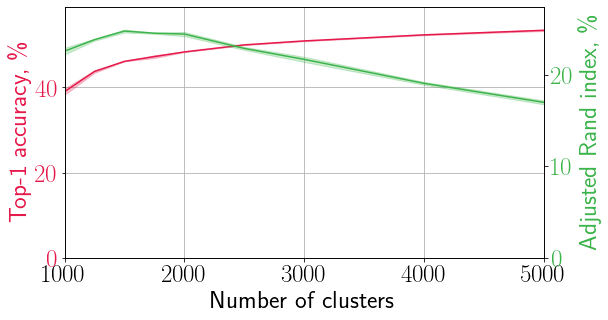

In [6]:
fig, ax1 = plt.subplots(figsize=(9, 5))


color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Top-1 accuracy, \%', color=colors[0])

ax1.plot(over_cnt*cl_basic,over_acc_mean,color=colors[0],label='Accuracy')    
ax1.fill_between(over_cnt*cl_basic, over_acc_mean+over_acc_std, over_acc_mean-over_acc_std,
                     color=colors[0], alpha=.25)
ax1.tick_params(axis='y', labelcolor=colors[0])

ax1.set_ylim(0,(over_acc_mean+over_acc_std).max()*1.1)
ax1.grid()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Adjusted Rand index, \%', color=colors[1])

ax2.plot(over_cnt*cl_basic,over_ari_mean,color=colors[1],label='Adjusted Rand index')    
ax2.fill_between(over_cnt*cl_basic, over_ari_mean+over_ari_std, over_ari_mean-over_ari_std,
                     color=colors[1], alpha=.25)
ax2.tick_params(axis='y', labelcolor=colors[1])

#plt.legend()
plt.xlim(1000,5000)
ax2.set_ylim(0,(over_ari_mean+over_ari_std).max()*1.1)
ax1.xaxis.set_major_formatter(ScalarFormatter())
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
# plt.xlabel('')
# plt.ylabel('')
fig.tight_layout()
plt.savefig('over_ablation.pdf')
plt.show()

In [7]:
lin_acc = np.array([71.1, 73.0,71.7, 61.3, 75.2, 77.2])
k_means_acc = np.array([23.09, 33.17,  22.40, 3, 38.6,39.07])
ari = np.array([11.99, 14.71,10.97,1.01, 22.15, 22.80])

lin_acc2 = np.array([75.3, 79.8])
k_means_acc2 = np.array([15.04, 31.15 ])
ari2 = np.array([7.72, 13.84 ])

k_means_acc_all = np.concatenate((k_means_acc,k_means_acc2))
ari_all = np.concatenate((ari,ari2))

k_means_acc3 = np.array([39.9])
ari3 = np.array([27.5])

In [8]:
# fit1
X1 = sm.add_constant(lin_acc)
mod1_ols = sm.OLS(k_means_acc, X1)
res1_ols = mod1_ols.fit()
print(res1_ols.summary())
print(res1_ols.rsquared)


intercept1, slope1 =  res1_ols.params


x1 = np.linspace(0.,100., 10000)
y1 = slope1*x1 + intercept1


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     72.14
Date:                Mon, 17 Aug 2020   Prob (F-statistic):            0.00105
Time:                        18:12:39   Log-Likelihood:                -14.804
No. Observations:                   6   AIC:                             33.61
Df Residuals:                       4   BIC:                             33.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -145.4009     20.296     -7.164      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [9]:
# fit2
X2 = sm.add_constant(k_means_acc_all)
mod2_ols = sm.OLS(ari_all, X2)
res2_ols = mod2_ols.fit()
print(res2_ols.summary())
print(res2_ols.rsquared)


intercept2, slope2 =  res2_ols.params


x2 = np.linspace(0.,100., 10000)
y2 = slope2*x2 + intercept2


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     96.32
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           6.45e-05
Time:                        18:12:39   Log-Likelihood:                -15.233
No. Observations:                   8   AIC:                             34.47
Df Residuals:                       6   BIC:                             34.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2599      1.611     -0.782      0.4

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


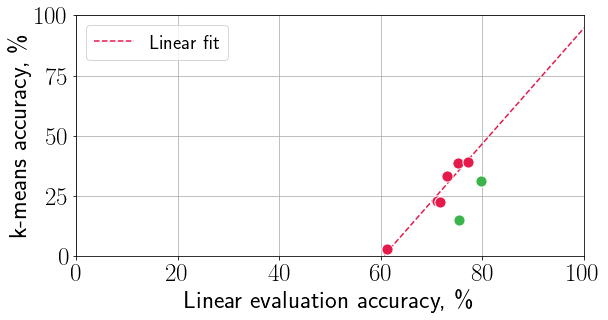

In [10]:


# plot
fig = plt.figure(figsize=(9, 5))


plt.scatter(lin_acc,k_means_acc,color=colors[0], marker='o', edgecolors='white', s=125, zorder=2) 
plt.scatter(lin_acc2,k_means_acc2,color=colors[1], marker='o', edgecolors='white', s=125, zorder=2)  
    
plt.plot(x1,y1,linestyle='dashed',color=colors[0],label='Linear fit', zorder=1)  
plt.legend()
plt.grid()
plt.xlabel('Linear evaluation accuracy, \%', fontsize=BIGGER_SIZE)
plt.ylabel('k-means accuracy, \%', fontsize=BIGGER_SIZE)
plt.xlim(0.,100.)
plt.ylim(0,100.)
fig.tight_layout()

plt.legend()

plt.savefig('lin_vs_uns.pdf')
plt.show()

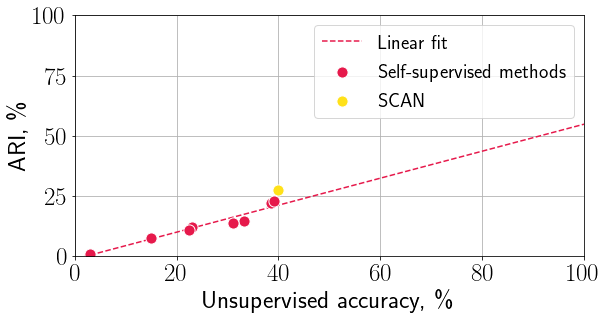

In [11]:
# plot
fig = plt.figure(figsize=(9, 5))


plt.scatter(k_means_acc_all,ari_all,color=colors[0], marker='o', edgecolors='white', s=125, zorder=2, label='Self-supervised methods') 
plt.scatter(k_means_acc3,ari3,color=colors[2], marker='o', edgecolors='white', s=125, zorder=2, label='SCAN') 
    
plt.plot(x2,y2,linestyle='dashed',color=colors[0],label='Linear fit', zorder=1)  
plt.legend()
plt.grid()
plt.xlabel('Unsupervised accuracy, \%', fontsize=BIGGER_SIZE)
plt.ylabel('ARI, \%', fontsize=BIGGER_SIZE)
plt.xlim(0.,100.)
plt.ylim(0,100.)
fig.tight_layout()

plt.legend()

plt.savefig('uns_vs_ari.pdf')
plt.show()